<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto baseia-se na criação de um Modelo de Regressão para Previsão de Satisfação de Clientes. </i>       
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>  Este projeto tem o intuito de ser um Modelo de Machine Learning para prever a insatisfação dos Clientes. A coluna ‘TARGET’ é a variável resposta. Ela é igual a 1 para clientes insatisfeitos e igual a 0 para clientes satisfeitos. Duas bases são dadas, uma para treino e uma para avaliação. Três são as tarefas a serem realizadas.


</i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>  

a) Um falso positivo ocorre quando classificamos um cliente como insatisfeito, mas ela não se comporta como tal. Neste caso, o custo de preparar e executar uma ação de retenção é um valor fixo de R$ 10 por cliente. Nada é ganho pois a ação de retenção não é capaz de mudar o comportamento do cliente. Um falso negativo ocorre quando um cliente é previsto como satisfeito, mas na verdade ele estava insatisfeito. Neste caso, nenhum dinheiro foi gasto e nada foi ganho. Um verdadeiro positivo é um cliente que estava insatisfeito e foi alvo de uma ação de retenção. O benefício neste caso é o lucro da ação (R$ 100) menos os custos relacionados à ação de retenção (R$ 10). Por fim, um verdadeiro negativo é um cliente insatisfeito e que não é alvo de nenhuma ação. O benefício neste caso é zero, isto é, nenhum custo, mas nenhum lucro. A primeira tarefa deste case é maximizar o lucro esperado por cliente considerando o contexto descrito no parágrafo acima.

b) A segunda tarefa consiste em dar uma nota de 1 a 5 para cada cliente da base teste, respeitando a variável ‘TARGET’, isto é, o seu nível de satisfação, sendo 1 o mais insatisfeito e 5 o mais satisfeito. Ao dar essa nota deve-se ter em mente que somente os clientes com nota 1 serão alvos de uma ação de retenção e que o objetivo dessa ação é maximizar o lucro esperado por cliente (usando os mesmos valores da primeira questão).

c) Todo conjunto de dados é passível de ser dividido em grupos coesos, conhecidos como agrupamentos naturais. A terceira tarefa é encontrar os três grupos naturais que possuem os maiores lucros esperados por cliente (usando os mesmos valores da
primeira questão).


</i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> 
</i> 
</p>  


https://www.kaggle.com/competitions/santander-customer-transaction-prediction


# <font color='red' style='font-size: 40px;'> Bibliotecas Utilizadas </font>
<hr style='border: 2px solid red;'>

In [33]:
## Bibliotecas De Manipulação de Dados e Visualização
import pandas as pd 
import builtins as builtins
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display, Image

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon, kruskal, uniform
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.diagnostic import lilliefors

# Bibliotecas de Manipulação de Tempo
import time
import datetime

# Bibliotecas de Seleção de Modelos
from skopt.space import Real, Categorical, Integer 
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, f_regression, mutual_info_classif, mutual_info_regression
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection

# Bibliotecas de Pré-Processamento e Pipeline
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Bibliotecas de Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Bibliotecas de Métricas de Machine Learning
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, silhouette_score


# Parâmetros de Otimização
import warnings
%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

In [34]:
XGBClassifier('')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='', predictor=None,
              random_state=None, reg_alpha=None, ...)

# <font color='red' style='font-size: 40px;'> Funções </font>
<hr style='border: 2px solid red;'>

## Funções de Visualização

* Plota Barras 

In [35]:
def plota_barras(lista_variaveis, hue, df, linhas, colunas, titulo):
    if hue != False:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', hue = hue)
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = builtins.sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height,
                        f'{builtins.round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, builtins.max(sizes)*1.1)
            plt.show()
        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        else: 
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
    else:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', color='#1FB3E5')
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = builtins.sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height,
                        f'{builtins.round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, builtins.max(sizes)*1.1)
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        else:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1


* Plota Histogramas 

In [36]:
def plota_histograma(lista_variaveis, df, linhas, colunas, titulo):
    if (linhas == 1) and (colunas == 1): 
        k = 0
        mediana = df[lista_variaveis[k]].median()
        media = df[lista_variaveis[k]].mean().round()
        plt.figure(figsize = (14, 7))
        ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', bins = 30)
        ax.set_title(f'{titulo}')
        ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
        ax.set_ylabel(f'Frequência', fontsize = 14)
        ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
        ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
        plt.ticklabel_format(style='plain')
        plt.legend(loc = 'best')
        plt.show()
    elif linhas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 7), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = df[lista_variaveis[k]].mean().round()
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1
    elif colunas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 7), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = df[lista_variaveis[k]].mean().round()
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1
    else:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 7), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = df[lista_variaveis[k]].mean().round()
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1

* Plota Boxplot

In [37]:
def plota_boxplot(lista_variaveis, df, linhas, colunas, titulo):
    if (linhas == 1) and (colunas == 1): 
        k = 0
        plt.figure(figsize = (14, 10))
        ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', orient = 'h')
        ax.set_title(f'{titulo}')
        ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
        ax.set_ylabel(f'Frequência', fontsize = 14)
        plt.show()
    elif linhas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 10), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], orient = 'h')
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1
    elif colunas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 10), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], orient = 'h')
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1
    else:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 10), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], orient = 'h')
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1

## Funções de Estatística

* Analisa Correlação

In [38]:
def analisa_correlacao(metodo, df):
    plt.figure(figsize = (10, 5))
    sns.heatmap(df.corr(method = metodo), vmin = -1, vmax = 1, cmap = 'magma', annot = True)
    plt.title(f"Analisando Correlação de {metodo}")
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

* Analisa Normalidade 

In [39]:
def analisa_normalidade(amostra1, amostra2, variavel):

    normaltest_amostra_1 = normaltest(amostra1[variavel])
    normaltest_amostra_2 = normaltest(amostra2[variavel])

    if (normaltest_amostra_1[1] < 0.05 ) and (normaltest_amostra_2[1] < 0.05):
        print(f'Pelo Teste de Hipótese, A Hipótese Nula de que a variável "{variavel}" segue uma Distribuição Normal é REJEITADA!')
    else:
        print(f'Pelo Teste de Hipótese, A Hipótese Nula de  que a variável "{variavel}" segue uma Distribuição Normal é ACEITA')

    ax1 = plt.subplot(121)
    stats.probplot(amostra1[variavel], dist = 'norm', plot = plt)
    plt.title(f'Amostra 1', fontsize = 14)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    ax1 = plt.subplot(122)
    stats.probplot(amostra2[variavel], dist = 'norm', plot = plt)
    plt.title(f'Amostra 2', fontsize = 14)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()

    plt.show()

* Teste de Hipótese para Duas Amostras Independentes 

In [40]:
def teste_hipotese_duas_amostras_independentes(parametrico, amostra1, amostra2, variavel):
    media_amostra_1 = amostra1[variavel].mean()
    media_amostra_2 = amostra2[variavel].mean()
    mediana_amostra_1 = amostra1[variavel].median()
    mediana_amostra_2 = amostra2[variavel].median()

    if parametrico == True: 
        print(f'Média Amostra 1: {media_amostra_1}')
        print(f'Média Amostra 2: {media_amostra_2}')
        stat, p_value = ztest(amostra1[variavel], amostra2[variavel]) 
        if p_value > 0.05:
            print(f'Pelo Teste de Hipótese Z, não há diferença significativa entre as médias da Amostra 1 e Amostra 2')
        else:
            print(f'Pelo Teste de Hipótese Z, há diferença significativa entre as médias da Amostra 1 e Amostra 2')
    else:
        print(f'Mediana Amostra 1: {mediana_amostra_1}')
        print(f'Mediana Amostra 2: {mediana_amostra_2}')
        stat, p_value = stats.mannwhitneyu(amostra1[variavel], amostra2[variavel]) 
        if p_value > 0.05:
            print(f'Pelo Teste de Hipótese de Mann Whitney, não há diferença significativa entre as medianas da Amostra 1 e Amostra 2')
        else:
            print(f'Pelo Teste de Hipótese de Mann Whitney, há diferença significativa entre as medianas da Amostra 1 e Amostra 2')

## Funções de Pré-Processamento

* Separa entre Features e Target 

In [41]:
def separa_feature_target(target, dados):
    x = dados.drop(target, axis = 1)
    y = dados[[target]]

    return x, y

* Separa entre Treino e Teste

In [42]:
def separa_treino_teste(target, dados, size):
    x = dados.drop(target, axis = 1)
    y = dados[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= size, random_state = 42)

    df_train = pd.concat([x_train, y_train], axis = 1)
    df_test = pd.concat([x_test, y_test], axis = 1)

    return df_train, df_test

- Remove Features de baixa Variância

In [43]:
def remove_features_baixa_variancia(target, df, threshold):
    target_column = df[target]
    features = df.drop(target, axis=1)

    selector = VarianceThreshold(threshold=threshold)
    features_filtered = selector.fit_transform(features)

    feature_indices = selector.get_support(indices=True)
    selected_features = features.columns[feature_indices]
    selected_features = selected_features.append(pd.Index([target]))

    return selected_features.tolist()

- Remove Features com Ruído

In [ ]:
def remove_features_com_ruido(target, df):
    target_column = df[target]
    features = df.drop(target, axis=1)

    selected_features = [col for col in features.columns if (features[col].mean() > 0) or (features[col].min() > 0)]
    selected_features = selected_features + [target]

    return selected_features

- Remove Features com Base no teste estatístico de interesse 

In [ ]:
def Select_K_Best(target, df_train, score_func, k):
    x_train = separa_feature_target(target, df_train)[0]
    y_train = separa_feature_target(target, df_train)[1]

    # Seleciona as k melhores features baseadas no teste qui-quadrado
    kbest_selector = SelectKBest(score_func=score_func, k=k)
    x_train_selected = kbest_selector.fit_transform(x_train, y_train)

    # Obtém os índices das colunas selecionadas
    feature_indices = kbest_selector.get_support(indices=True)

    # Obtém os nomes das colunas selecionadas
    selected_features = list(x_train.columns[feature_indices])
    selected_features.append(target)

    return selected_features


## Funções de Métricas ou Avaliação

- KS

In [44]:
def calculate_ks(classificador, y_predict_proba):
    # Cria um DataFrame com a coluna y_predict_proba
    df = pd.DataFrame({'y_predict_proba': y_predict_proba})

    # Define os decis para as faixas
    deciles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

    # Calcula as proporções acumuladas de negativos (classe 0) e positivos (classe 1) para cada faixa de decil
    df['decile_range'] = pd.qcut(df['y_predict_proba'], q=deciles, labels=False)
    df_grouped = df.groupby('decile_range').agg({'y_predict_proba': ['count', 'sum']}).reset_index()
    df_grouped.columns = ['decile_range', 'count', 'sum']
    df_grouped['cumulative_negative'] = df_grouped['count'].cumsum() - df_grouped['count']
    df_grouped['cumulative_positive'] = df_grouped['sum'].cumsum()
    df_grouped['cumulative_negative_ratio'] = df_grouped['cumulative_negative'] / df_grouped['cumulative_negative'].max()
    df_grouped['cumulative_positive_ratio'] = df_grouped['cumulative_positive'] / df_grouped['cumulative_positive'].max()
    df_grouped['ks'] = (np.abs(df_grouped['cumulative_positive_ratio'] - df_grouped['cumulative_negative_ratio']))*100

    # Tabela de valores de KS para cada faixa de decil
    ks_table = df_grouped[['decile_range', 'ks']]
    ks_table['decile_range'] = ks_table['decile_range'].apply(lambda x: f'{x*10}-{(x*10)+10}')

    return ks_table, round(ks_table['ks'].max(), 2)


* Métricas Gerais

In [45]:
def metricas_classificacao(classificador, y_train, y_predict_train, y_test, y_predict_test):
    accuracy = accuracy_score(y_train, y_predict_train)
    precision = precision_score(y_train, y_predict_train)
    recall = recall_score(y_train, y_predict_train)
    f1 = f1_score(y_train, y_predict_train)
    metricas_treino = pd.DataFrame({'Acuracia':accuracy, 'Precisao':precision, 'Recall':recall, 'F1':f1, 'Etapa':'treino','Classificador':classificador}, index = np.arange(1))
    
    accuracy = accuracy_score(y_test, y_predict_test)
    precision = precision_score(y_test, y_predict_test)
    recall = recall_score(y_test, y_predict_test)
    f1 = f1_score(y_test, y_predict_test)
    metricas_teste = pd.DataFrame({'Acuracia':accuracy, 'Precisao':precision, 'Recall':recall, 'F1':f1, 'Etapa':'teste','Classificador':classificador}, index = np.arange(1, 2))
    
    metricas_finais = pd.concat([metricas_treino, metricas_teste])

    return metricas_finais

* Validação Cruzada 

In [127]:
def validacao_cruzada_classificacao(classificador, x_train, y_train, class_weight, n_splits):
    numericas = [column for column in x_train.columns if (x_train[column].dtype.name == 'int64') or (x_train[column].dtype.name == 'float64')]

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    models = {
        'Regressão Logística': make_pipeline(
            ColumnTransformer([
                ('num', make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), numericas)
                ]),
            LogisticRegression(random_state=42, class_weight={0:1, 1:class_weight})
        ),
        'Random Forest': make_pipeline(
            ColumnTransformer([
                ('num', make_pipeline(SimpleImputer(strategy='median')), numericas)
                ]),
            RandomForestClassifier(random_state=42, criterion='log_loss', n_estimators=50, max_depth=5, class_weight={0:1, 1:class_weight})
        ),
        'XGBoost': make_pipeline(
            ColumnTransformer([
                ('num', make_pipeline(SimpleImputer(strategy='median')), numericas)
                ]),
            XGBClassifier(random_state=42, n_estimators=20, max_depth=5, learning_rate=0.01, eval_metric='logloss', objective='binary:logistic', reg_alpha = 1, reg_lambda = 1, gamma = 1, colsample_bytree = 0.5, subsample = 0.5, scale_pos_weight = class_weight)
        )
    }

    if classificador in models:
        model = models[classificador]
    else:
        print('Utilize Regressão Logística, Random Forest ou XGBoost como opções de Classificadores!')
    
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    scores = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring, return_train_score=False)
    
    metricas_finais = pd.DataFrame({
        'Acuracia': scores['test_accuracy'].mean(),
        'Precisao': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1': scores['test_f1'].mean(),
        'Etapa': 'validacao_cruzada',
        'Classificador': classificador
    }, index=[1])
    
    return metricas_finais


- Junção de Matrizes 

In [47]:
def metricas_classificacao_modelos_juntos(lista_modelos):
    metricas_modelos = pd.concat(lista_modelos).set_index('Classificador')
    return metricas_modelos

- Retorno Financeiro

In [48]:
def retorno_financeiro(target, y_true, y_predict):
    df = pd.DataFrame({'y_true':y_true[target].values, 'y_predict':y_predict})

    TN = df.loc[(df['y_true'] == 0) & (df['y_predict'] == 0)].shape[0]
    FN = df.loc[(df['y_true'] == 1) & (df['y_predict'] == 0)].shape[0]
    FP = df.loc[(df['y_true'] == 0) & (df['y_predict'] == 1)].shape[0]
    TP = df.loc[(df['y_true'] == 1) & (df['y_predict'] == 1)].shape[0]

    matriz_confusao = np.array(
        [(TN, FP),
        (FN, TP)]
    )
    matriz_custo_beneficios = np.array(
        [(0, 10),
        (0, 90)]
    )
    retorno_financeiro = 'R$' + str(
        (matriz_confusao[0, 0]*matriz_custo_beneficios[0, 0]) - (matriz_confusao[0, 1]*matriz_custo_beneficios[0, 1]) - (matriz_confusao[1, 0]*matriz_custo_beneficios[1, 0]) + (matriz_confusao[1, 1]*matriz_custo_beneficios[1, 1])
        )
    retorno_financeiro_medio = 'R$' + str(
        ((matriz_confusao[0, 0]*matriz_custo_beneficios[0, 0]) - (matriz_confusao[0, 1]*matriz_custo_beneficios[0, 1]) - (matriz_confusao[1, 0]*matriz_custo_beneficios[1, 0]) + (matriz_confusao[1, 1]*matriz_custo_beneficios[1, 1]))/FN
        )
    print(f'O retorno financeiro é: {retorno_financeiro}')
    print(f'O retorno financeiro médio é: {retorno_financeiro_medio}')

## Funções de Machine Learning

- Algoritmos de Classificação

In [124]:
def Classificador(classificador, x_train, y_train, x_test, y_test, class_weight):
    numericas = [column for column in x_train.columns if (x_train[column].dtype.name == 'int64') or (x_train[column].dtype.name == 'float64')]

    models = {
        'Regressão Logística': make_pipeline(
            ColumnTransformer([
                ('num', make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), numericas)
                ]),
            LogisticRegression(random_state=42, class_weight = {0: 1, 1: class_weight})
        ),
        'Random Forest': make_pipeline(
            ColumnTransformer([
                ('num', make_pipeline(SimpleImputer(strategy='median')), numericas)
                ]),
            RandomForestClassifier(random_state=42, criterion='log_loss', n_estimators=50, max_depth=5, class_weight={0:1, 1:class_weight})
        ),
        'XGBoost': make_pipeline(
            ColumnTransformer([
                ('num', make_pipeline(SimpleImputer(strategy='median')), numericas)
                ]),
            XGBClassifier(random_state=42, n_estimators=20, max_depth=5, learning_rate=0.01, eval_metric='logloss', objective='binary:logistic', reg_alpha = 1, reg_lambda = 1, gamma = 1, colsample_bytree = 0.5, subsample = 0.5, scale_pos_weight = class_weight)
        )
    }

    if classificador in models:
        model = models[classificador]
    else:
        print('Utilize Regressão Logística, Random Forest ou XGBoost como opções de Classificadores!')

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    y_proba_train = model.predict_proba(x_train)
    y_proba_test = model.predict_proba(x_test)

    return model, y_pred_train, y_pred_test, y_proba_train, y_proba_test


- Algoritmos de Classificação Otimizados

In [207]:
def modelo_otimizado(classificador, x_train, y_train, x_test, y_test):
    # Define as colunas categóricas e numéricas
    numericas = [column for column in x_train.columns if (x_train[column].dtype.name == 'int64') or (x_train[column].dtype.name == 'float64')]

    # Define o ColumnTransformer
    preprocessor = ColumnTransformer([
        ('num', make_pipeline(SimpleImputer(strategy='median')), numericas)
    ])

    # Define o modelo de XGBoost com a otimização de hiperparâmetros via BayesSearch
    model = make_pipeline(
        preprocessor,
        BayesSearchCV(
            XGBClassifier(random_state=42, eval_metric='logloss', objective='binary:logistic'), # , reg_alpha = 1, reg_lambda = 1, gamma = 1, colsample_bytree = 0.5, subsample = 0.5
            {
                'n_estimators': (10, 20, 50),
                'max_depth': (5, 7, 10),
                'learning_rate': (0.01, 0.05),
                'reg_alpha':(0.5, 1),
                'reg_lambda':(0.5, 1),
                'gamma':(0.5, 1),
                'colsample_bytree':(0.5, 1),
                'subsample':(0.5, 1),
                'scale_pos_weight':(10, 12, 14)
            },
            n_iter=10,
            random_state=42,
            n_jobs=-1,
            scoring='accuracy',
            cv=5
        )
    )

    # Treina o modelo
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    y_proba_train = model.predict_proba(x_train)
    y_proba_test = model.predict_proba(x_test)

    # Extrai os 20 melhores recursos com base no feature importance
    feature_importance = model.named_steps['bayessearchcv'].best_estimator_.feature_importances_
    top_20_indices = np.argsort(feature_importance)[::-1][:20]
    top_20_features = x_train.columns[top_20_indices]
    top_20_importance = feature_importance[top_20_indices]

    df_top_20_features = pd.DataFrame({'Feature': top_20_features, 'Importance': top_20_importance})

    return model, y_pred_train, y_pred_test, y_proba_train, y_proba_test, model.named_steps['bayessearchcv'].best_params_, df_top_20_features


* Algoritmo de Clusterização

In [51]:
def kmeans_esc(data, features , n_clusters):

    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42, max_iter = 300)
    kmeans = kmeans.fit(padronizado)
    
    clusters = kmeans.labels_ # Clusters para cada um dos registros 

    return clusters

* Definição do Número de Clusters pelo Elbow Method

In [52]:
def elbow_method(data, features):
    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    wcss = []
    for n_clusters in range(1, 11):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, max_iter=300)
        kmeans.fit(padronizado)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    sns.lineplot(range(1, 11), wcss, marker='o', color='orange')
    plt.title('O Método Elbow', fontsize=16, fontweight='bold')
    plt.xlabel('Número de Clusters', fontsize=12)
    plt.ylabel('WCSS (Soma dos Quadrados das Distâncias)', fontsize=12)
    plt.xticks(range(1, 11))
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


* Reordenando Clusters

In [53]:
def ordenador_de_cluster(metodo_cluster, variavel, ordem, dados):

    media_cluster = dados.groupby(metodo_cluster, as_index = False)[variavel].mean()
    score_cluster = media_cluster.sort_values(by = variavel, ascending = ordem)
    score_cluster['index'] = media_cluster.index 

    df_final = dados.merge(score_cluster[[metodo_cluster, 'index']], on = metodo_cluster)
    df_final.drop(metodo_cluster, axis = 1, inplace = True)
    df_final.rename({'index':metodo_cluster}, axis = 1, inplace = True)


    return df_final


# <font color='red' style='font-size: 40px;'> 1) Divisão Inicial </font>
<hr style='border: 2px solid red;'>

### 1.1) Separação em Treino, Teste e Validação

In [54]:
# train = pd.read_csv('../100_case_santander/data/train.csv')
# test = pd.read_csv('../100_case_santander/data/test.csv')

train = pd.read_csv('../100_case_santander/data/santander_train.csv')
test = pd.read_csv('../100_case_santander/data/santander_test.csv')

train.drop('ID', axis = 1, inplace = True)
test.drop('ID', axis = 1, inplace = True)

df_train = separa_treino_teste('TARGET', train, 0.25)[0]
df_valid = separa_treino_teste('TARGET', train, 0.25)[1]
df_test = test.copy()

print(f'Quantidade de registros Treino: {df_train.shape[0]}')
print(f'Quantidade de registros Validação: {df_valid.shape[0]}')
print(f'Quantidade de registros Teste: {df_test.shape[0]}')

Quantidade de registros Treino: 57015
Quantidade de registros Validação: 19005
Quantidade de registros Teste: 75818


> 1. Antes de qualquer análise ou modelagem, deve-se separar em Treino, Validação e Teste. 

> 2. Isso é fundamental para o projeto, pois esta abordagem evita o Data Leakage (Vazamento de Dados)

> 3. Dessa forma, teremos três situações:

- Treino: Dados usados para Análise Exploratória e Modelagem
- Validação: Dados usados para Análise de Desempenho do Modelo
- Teste: Predição de Dados nunca vistos anteriormente, simulando um ambiente em produção

# <font color='red' style='font-size: 40px;'> 2) Análise Exploratória - Análise Univariada e Bivariada</font>
<hr style='border: 2px solid red;'>

### 2.2) Análise dos Tipos de Variáveis

In [55]:
analytics = df_train.copy()

qualitativas = [column for column in analytics.columns if analytics[column].dtype.name == 'object']
discretas = [column for column in analytics.columns if analytics[column].nunique() < 100 and analytics[column].dtype.name == 'int64']
continuas = [column for column in analytics.columns if analytics[column].nunique() >= 100]

print(f'Quantidade de Colunas Qualitativas: {len(qualitativas)}')
print(f'Quantidade de Colunas Discretas: {len(discretas)}')
print(f'Quantidade de Colunas Continuas: {len(continuas)}')

Quantidade de Colunas Qualitativas: 0
Quantidade de Colunas Discretas: 256
Quantidade de Colunas Continuas: 60


### 2.3) Análise da Qualidade dos Dados

In [56]:
nulos = analytics.isnull().sum().sum()
print(f'Quantidade de Dados Nulos: {nulos}')

Quantidade de Dados Nulos: 0


### 2.4) Análise Univaridada da Target

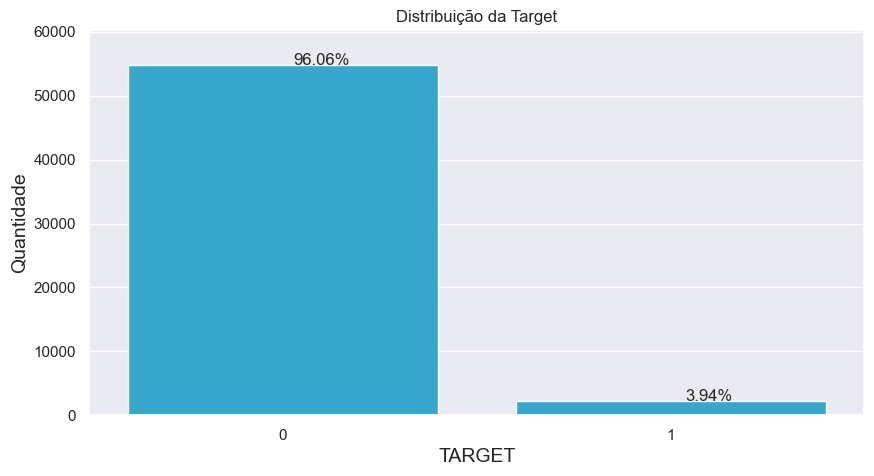

In [57]:
plota_barras(['TARGET'], False, analytics, 1, 1, 'Distribuição da Target')

> 1. A Target possui um comportamento bem desbalanceado, ou seja, em torno de 96% dos clientes apresentam satisfação, ao passo que 4% apresenta insatisfação.

### 2.5) Feature Selection Inicial

In [ ]:
analytics_select = analytics[remove_features_baixa_variancia('TARGET', analytics, 0.01)]
analytics_select = analytics_select[remove_features_com_ruido('TARGET', analytics_select)]
analytics_select = analytics_select[Select_K_Best('TARGET', analytics_select, f_classif, 50)]
print(analytics_select.shape)
analytics_selected.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### 2.6) Testando a Hipótese do Público Satisfeito e do Insatisfeito ter comportamentos diferentes

# <font color='red' style='font-size: 40px;'> 3) Pré-Processamento e Feature Engineering </font>
<hr style='border: 2px solid red;'>

### 3.1) Remoção de Features com Baixa Variância ou Ruído

In [140]:
df_train = df_train[remove_features_baixa_variancia('TARGET', df_train, 0.01)]
df_train = df_train[remove_features_com_ruido('TARGET', df_train)]
df_train.shape

(57015, 270)

### 3.2) Seleção de Features com Maior Dependência com a Target

In [141]:
df_train = df_train[Select_K_Best('TARGET', df_train, f_classif, 50)]
df_train.shape

(57015, 51)

### 3.3) Separação entre Features e Target

In [142]:
x_train = separa_feature_target('TARGET', df_train)[0]
y_train = separa_feature_target('TARGET', df_train)[1]

x_valid = separa_feature_target('TARGET', df_valid)[0]
y_valid = separa_feature_target('TARGET', df_valid)[1]

# <font color='red' style='font-size: 40px;'> 4) Modelagem </font>
<hr style='border: 2px solid red;'>

### 4.1) Modelos Baseline 

In [143]:
# Regressão Logística
y_predict_train_reg_logistic = Classificador('Regressão Logística', x_train, y_train, x_valid, y_valid, 10)[1]
y_predict_valid_reg_logistic = Classificador('Regressão Logística', x_train, y_train, x_valid, y_valid, 10)[2]
y_proba_train_reg_logistic = Classificador('Regressão Logística', x_train, y_train, x_valid, y_valid, 10)[3]
y_proba_valid_reg_logistic = Classificador('Regressão Logística', x_train, y_train, x_valid, y_valid, 10)[4]

# Random Forest
y_predict_train_random_forest = Classificador('Random Forest', x_train, y_train, x_valid, y_valid, 10)[1]
y_predict_valid_random_forest = Classificador('Random Forest', x_train, y_train, x_valid, y_valid, 10)[2]
y_proba_train_random_forest = Classificador('Random Forest', x_train, y_train, x_valid, y_valid, 10)[3]
y_proba_valid_random_forest = Classificador('Random Forest', x_train, y_train, x_valid, y_valid, 10)[4]

# XGBoost
y_predict_train_xgboost = Classificador('XGBoost', x_train, y_train, x_valid, y_valid, 10)[1]
y_predict_valid_xgboost = Classificador('XGBoost', x_train, y_train, x_valid, y_valid, 10)[2]
y_proba_train_xgboost = Classificador('XGBoost', x_train, y_train, x_valid, y_valid, 10)[3]
y_proba_valid_xgboost = Classificador('XGBoost', x_train, y_train, x_valid, y_valid, 10)[4]

> 1. Para a parte de modelagem, escolheu-se três modelos: Regressão Logística, Random Forest e XGBoost 

> 2. A Regressão Logística foi escolhida por ser um modelo estável e muito tradicional, com boa capacidade de interpretababilidade 

> 3. A Random Forest é um ensemble o qual utiliza Bagging, portanto, ela reduz expressivamente a variância e previne problemas como Overfitting. 

> 4. O XGBoost, ao lado do CatBoost, é provavelmente o modelo de Boosting com maior poder preditivo que existe atualmente, permitindo que as previsões sejam muito precisas. 

### 4.2) Métricas e Retorno Financeiro

In [152]:
# Métricas Modelos

metricas_reg_logistic = metricas_classificacao('Regressão Logística', y_train, y_predict_train_reg_logistic, y_valid, y_predict_valid_reg_logistic)
metricas_reg_logistic_validacao_cruzada = validacao_cruzada_classificacao('Regressão Logística', x_train, y_train, 10, 5)

metricas_random_forest = metricas_classificacao('Random Forest', y_train, y_predict_train_random_forest, y_valid, y_predict_valid_random_forest)
metricas_random_forest_validacao_cruzada = validacao_cruzada_classificacao('Random Forest', x_train, y_train, 10, 5)

metricas_xgboost = metricas_classificacao('XGBoost', y_train, y_predict_train_xgboost, y_valid, y_predict_valid_xgboost)
metricas_xgboost_validacao_cruzada = validacao_cruzada_classificacao('XGBoost', x_train, y_train, 10, 5)

# Métricas Finais

print('Métricas Finais')
metricas_finais = metricas_classificacao_modelos_juntos(
    [
        metricas_reg_logistic, 
        metricas_reg_logistic_validacao_cruzada,
        metricas_random_forest,
        metricas_random_forest_validacao_cruzada,
        metricas_xgboost,
        metricas_xgboost_validacao_cruzada
    ]
)
display(metricas_finais)
# Retorno Financeiro
retorno_financeiro('TARGET', y_valid, y_predict_valid_xgboost)

Métricas Finais


,Acuracia,Precisao,Recall,F1,Etapa
Classificador,,,,,
Regressão Logística,0.89,0.16,0.40,0.23,treino
Regressão Logística,0.89,0.15,0.38,0.22,teste
Regressão Logística,0.89,0.16,0.40,0.23,validacao_cruzada
Random Forest,0.88,0.17,0.54,0.26,treino
Random Forest,0.88,0.16,0.49,0.24,teste
Random Forest,0.88,0.17,0.52,0.26,validacao_cruzada
XGBoost,0.88,0.18,0.55,0.27,treino
XGBoost,0.88,0.17,0.50,0.25,teste
XGBoost,0.88,0.17,0.53,0.26,validacao_cruzada


O retorno financeiro é: R$15010
O retorno financeiro médio é: R$39.39632545931759


> 1. Realizou-se a consolidação das Métricas de Treino, Teste e Validação Cruzada para cada um dos Modelos. 

> 2. A métrica mais importante para este caso seria o Precision, pois altos valores de Precision significam um menor número de Falsos Positivos, reduzindo os custos de ação 

> 3. Mesmo com a Precision sendo o principal indicador, o Recall foi a maior métrica devido ao balanceamento de classes. Isso ocorre pois essa técnica proporciona ao modelo a capacidade de penalizar a classe minoritária, portanto, ele passa a acertar mais quem realmente era um cliente insatisfeito, diminuindo drasticamente os Falsos Negativos.

> 4. Traduzindo para retorno financeiro, até o presente momento este Modelo conseguiu um valor integral de R$16880, com um retorno médio de clientes insatisfeitos de praticamente R$50,00. Esses valores foram criados exclusivamente com dados de validação.

> 5. A próxima etapa é otimizar o Modelo com melhor performance da Baseline.

### 4.3) Otimização do Modelo Escolhido

In [215]:
# Modelo Otimizado
modelo_final = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[0]
melhores_parametros = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[5]
melhores_features = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[6]

y_predict_train_otimizado = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[1]
y_predict_valid_otimizado = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[2]
y_proba_train_otimizado = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[3]
y_proba_valid_otimizado = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[4]
metricas_otimizadas = metricas_classificacao('XGBoost', y_train, y_predict_train_xgboost, y_valid, y_predict_valid_xgboost)

# Métricas Otimizadas
print('Métricas Finais')
display(metricas_otimizadas)
print()

# KS
print('KS')
ks = calculate_ks('XGBoost', y_proba_valid_otimizado[:, -1])[0]
display(ks)

# Retorno Financeiro
print('Retorno Financeiro')
retorno_financeiro('TARGET', y_valid, y_predict_valid_otimizado)
print()

# Melhores Hiperparâmetros e Features
print(f'Melhores Parâmetros: {melhores_parametros}')
print()
display(melhores_features)

Métricas Finais


,Acuracia,Precisao,Recall,F1,Etapa,Classificador
0,0.88,0.18,0.55,0.27,treino,XGBoost
1,0.88,0.17,0.50,0.25,teste,XGBoost



KS


,decile_range,ks
0,0.0-10.0,9.03
1,10.0-20.0,4.72
2,20.0-30.0,4.12
3,30.0-40.0,4.62
4,40.0-50.0,3.15
5,50.0-60.0,4.43
6,60.0-70.0,5.62
7,70.0-80.0,4.36
8,80.0-90.0,0.00


Retorno Financeiro
O retorno financeiro é: R$15540
O retorno financeiro médio é: R$41.44

Melhores Parâmetros: OrderedDict([('colsample_bytree', 0.7717015338451563), ('gamma', 0.9600046132186582), ('learning_rate', 0.029858668143868672), ('max_depth', 10), ('n_estimators', 20), ('reg_alpha', 0.5255672768385259), ('reg_lambda', 0.785388901339449), ('scale_pos_weight', 10), ('subsample', 0.6928647954923324)])



,Feature,Importance
0,ind_var30,0.21
1,var15,0.08
2,saldo_var30,0.08
3,num_var30_0,0.05
4,imp_op_var39_efect_ult1,0.04
5,num_var5,0.03
6,num_var4,0.03
7,imp_op_var41_efect_ult1,0.03
8,ind_var8_0,0.02
9,ind_var5_0,0.02


> 1. Optou-se por utilizar um Algoritmo de Busca Bayesiana para achar a melhor combinação de hiperparâmetros

> 2. Esse algoritmo aplica probabilidades condicionais para decidir, no fim, a combinação de hiperparâmetros que possui a maior probabilidade de maximizar a métrica desejada

> 3. Após a otimização, notou-se uma melhora do retorno financeiro 

# <font color='red' style='font-size: 40px;'> 5) Solução Questões </font>
<hr style='border: 2px solid red;'>

### 5.1) Maximização do Lucro Esperado por Cliente

In [204]:
def retorno_financeiro_esperado_por_rating(target, y_true, y_predict_proba):
    df = pd.DataFrame({'Predict_Proba': y_predict_proba[:, 1]})
    df['Rating'] = np.where(df['Predict_Proba'] >= 0.7, 1,
                  np.where(df['Predict_Proba'] >= 0.6, 2,
                  np.where(df['Predict_Proba'] >= 0.4, 3,
                  np.where(df['Predict_Proba'] >= 0.2, 4,
                  5))))

    matriz_confusao = pd.crosstab(y_true[target], df['Rating'])
    matriz_custo_beneficios = np.array([(0, 10), (0, 90)])

    # retorno_financeiro = (matriz_confusao.values * matriz_custo_beneficios).sum()
    # lucro_esperado = pd.DataFrame({
    #     'Predict_Proba': df['Predict_Proba'],
    #     'Rating': df['Rating'],
    #     'Lucro_Esperado': retorno_financeiro
    # })

    return matriz_confusao, matriz_custo_beneficios#, lucro_esperado

In [206]:
matriz_confusion = retorno_financeiro_esperado_por_rating('TARGET', y_valid, y_proba_valid_otimizado)[0]
matriz_custo_benef = retorno_financeiro_esperado_por_rating('TARGET', y_valid, y_proba_valid_otimizado)[1]

display(matriz_confusion)
display(matriz_custo_benef)

Rating,2,3,4
TARGET,,,
0,11,980,3527
1,0,39,153


array([[ 0, 10],
       [ 0, 90]])

### 5.2) Criação de um Rating para a Amostra de Teste

### 5.3) Agrupamento dos Três Grupos Naturais com Base no Rating

In [ ]:
def kmeans_esc(data, features , n_clusters):

    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42, max_iter = 300)
    kmeans = kmeans.fit(padronizado)
    
    clusters = kmeans.labels_ # Clusters para cada um dos registros 

    return clusters


def elbow_method(data, features):
    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    wcss = []
    for n_clusters in range(1, 11):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, max_iter=300)
        kmeans.fit(padronizado)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    sns.lineplot(range(1, 11), wcss, marker='o', color='orange')
    plt.title('O Método Elbow', fontsize=16, fontweight='bold')
    plt.xlabel('Número de Clusters', fontsize=12)
    plt.ylabel('WCSS (Soma dos Quadrados das Distâncias)', fontsize=12)
    plt.xticks(range(1, 11))
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


def ordenador_de_cluster(metodo_cluster, variavel, ordem, dados):

    media_cluster = dados.groupby(metodo_cluster, as_index = False)[variavel].mean()
    score_cluster = media_cluster.sort_values(by = variavel, ascending = ordem)
    score_cluster['index'] = media_cluster.index 

    df_final = dados.merge(score_cluster[[metodo_cluster, 'index']], on = metodo_cluster)
    df_final.drop(metodo_cluster, axis = 1, inplace = True)
    df_final.rename({'index':metodo_cluster}, axis = 1, inplace = True)


    return df_final
